# Inferential statistics
## Part II - Exploratory Data Analysis

Before starting the actual analysis it's a good idea to explore the data that we will be using, to give yourself a first idea of the questions you will be able to answer with your data, the bias you could have, other data you could need, etc.

### Libraries
In addition to pandas we will also import matplolib and seaborn so that we will able to plot our data to better understand it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 100)

### Explore the dataset

Let's load the cleaned dataset first. Import it with the name `wnba` and show the head.

In [2]:
#your code here
wnba = pd.read_csv("../data/wnba_clean.csv")

**Use describe() to take an initial look at the data.**

In [4]:
#your code here
round(wnba.describe(), 2)

,Unnamed: 0,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
count,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00
mean,70.86,184.61,78.98,23.09,27.11,24.43,500.11,74.40,168.70,43.10,14.83,43.70,24.98,39.54,49.42,75.83,22.06,61.59,83.65,44.51,17.73,9.78,32.29,203.17,1.14,0.01
std,41.54,8.70,11.00,2.07,3.67,7.08,289.37,55.98,117.17,9.86,17.37,46.16,18.46,36.74,44.24,18.54,21.52,49.67,68.20,41.49,13.41,12.54,21.45,153.03,2.91,0.08
min,0.00,165.00,55.00,18.39,21.00,2.00,12.00,1.00,3.00,16.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,2.00,2.00,0.00,0.00
25%,35.25,175.75,71.50,21.79,24.00,22.00,242.25,27.00,69.00,37.12,0.00,3.00,0.00,13.00,17.25,71.58,7.00,26.00,34.25,11.25,7.00,2.00,14.00,77.25,0.00,0.00
50%,70.50,185.00,79.00,22.87,27.00,27.50,506.00,69.00,152.50,42.05,10.50,32.00,30.55,29.00,35.50,80.00,13.00,50.00,62.50,34.00,15.00,5.00,28.00,181.00,0.00,0.00
75%,106.75,191.00,86.00,24.18,30.00,29.00,752.50,105.00,244.75,48.63,22.00,65.50,36.18,53.25,66.50,85.92,31.00,84.00,116.50,66.75,27.50,12.00,48.00,277.75,1.00,0.00
max,142.00,206.00,113.00,31.56,36.00,32.00,1018.00,227.00,509.00,100.00,88.00,225.00,100.00,168.00,186.00,100.00,113.00,226.00,334.00,206.00,63.00,64.00,87.00,584.00,17.00,1.00


Most of the game-related stats have a very high range of values which can be explained by the fact that the dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

There are also some extremes in the weight and age columns. Feel free, if you'd like, to check which are the players with a very high (or low) age/weight and do some research on them. This is useful to confirm that they are simply outliers and not errors in the data.

In [31]:
#your code here
print(wnba.columns)

# Youngest: Bria Holmes, 23 -> but the describe method says that min age is 21..?
print("Youngest:\n", wnba.loc[wnba["Age"].min()])
print()

# Oldest: Courtney Paris, 29 -> but the describe method says that the max age is 36..?
print("Oldest:\n", wnba.loc[wnba["Age"].max()])
print()

# returns 2 players: Angel Robinson and Brionna Jones (p.s. -> using loc makes no difference in
# this case; I tried it)
print("Players that are 21:\n", wnba[wnba["Age"] == 21])
print()

# returns one player: Sue Bird
print("Players that are 36:\n", wnba[wnba["Age"] == 36])
print()

# What's going on? Is it missassigning the "Unnamed: 0" Series value to the "Age" Series when
# getting the min and max of "Age"?

# returns Evelyn Akhator, with Weight 82
print("Lowest weight:\n", wnba.loc[wnba["Weight"].min()])
print()

# returns Sancho Lyttle, with Weight 79???
print("Highest weight:\n", wnba.loc[wnba["Weight"].max()])
print()

# returns Moriah Jefferson
print("Players that weight 55:\n", wnba[wnba["Weight"] == 55])
print()

# returns Amanda Zahui B.
print("Players that weight 113:\n", wnba[wnba["Weight"] == 113])
print()

# "What's going on" indeed..

Index(['Unnamed: 0', 'Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI',
       'Birth_Place', 'Birthdate', 'Age', 'College', 'Experience',
       'Games Played', 'MIN', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS',
       'DD2', 'TD3'],
      dtype='object')
Youngest:
 Unnamed: 0                  21
Name               Bria Holmes
Team                       ATL
Pos                          G
Height                     185
Weight                      77
BMI                    22.4982
Birth_Place                 US
Birthdate       April 19, 1994
Age                         23
College          West Virginia
Experience                   R
Games Played                28
MIN                        655
FGM                         85
FGA                        231
FG%                       36.8
3PM                          9
3PA                         50
3P%                         18
FTM                         56

### Looking at the distributions of the data
Let's take a look at the distribution of the 4 stats that describe the physical characteristics of the players.

**Plot the four distributions about `height`, `weight`, `age` and `BMI`.**

Text(0.5, 1.0, 'BMI')

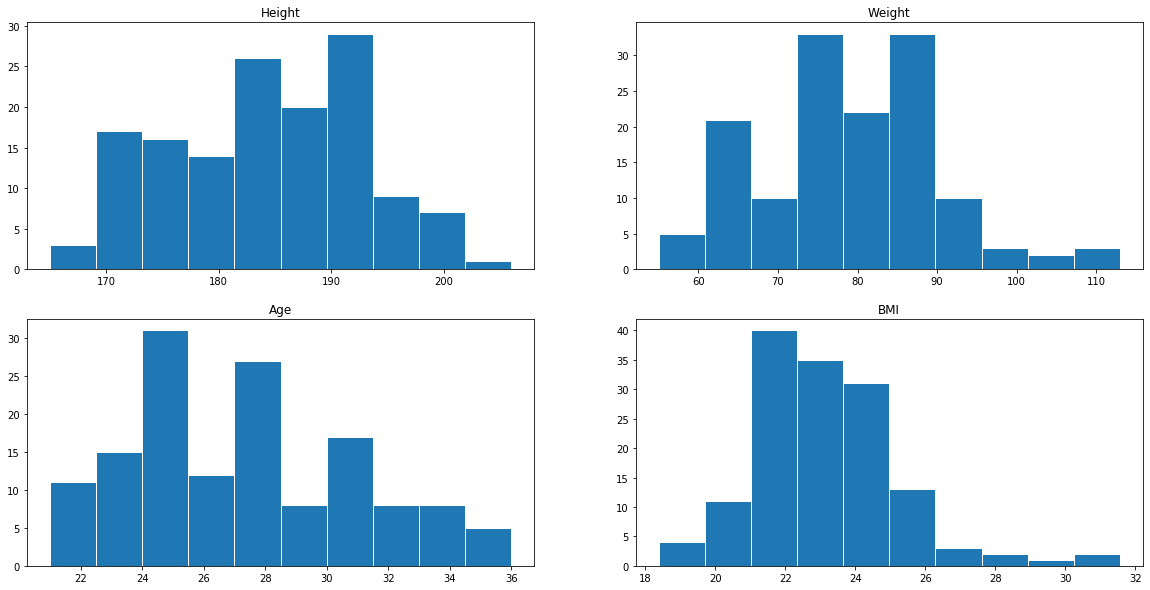

In [35]:
#your code here
# staging the figure area and arranging the plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20, 10))

# preparing the first plot
ax1.hist(wnba["Height"], edgecolor = "white")
ax1.set_title("Height")

# the second plot
ax2.hist(wnba["Weight"], edgecolor = "white")
ax2.set_title("Weight")

# the third
ax3.hist(wnba["Age"], edgecolor = "white")
ax3.set_title("Age")

# and the forth and final
ax4.hist(wnba["BMI"], edgecolor = "white")
ax4.set_title("BMI")

**What conclusions do you think we can take from this plots?**

In [6]:
#your conclusions here
"""
I don't know what I should be thinking from these plots.
"""

In addition to what the describe() method already told us we can see that the physical characteristics of the players (apart from the age) more or less follow a standard distribution, which is expected when looking at the distribution of values that arise from a lot of factors that are independent from each other as is the case for many physical quantities. 

The height distribution looks like a bimodal. This may be due to the fact that players in basketball fall under two main categories (please note that this is a very gross generalization): shorter and more agile, and taller and less agile. Therefore there are less "average" height players since they will neither be as agile as the shorter players nor have the same impact in the paint (that is, under the basket) as a taller player.

The age distribution is a bit skewed to the right which is expected since most professional players stop playing after their prime physical years come to an end.

In [ ]:
"""
«we can see that the physical characteristics of the players (apart from the age) more or less
follow a standard distribution, which is expected when looking at the distribution of values 
that arise from a lot of factors that are independent from each other as is the case for many 
physical quantities.»

I'm confused; Weight and Height are NOT that independent (that's the whole idea behind the BMI
and how it's used to quickly ascertain if a person is underweight, obese, or anything in 
between -> see https://en.wikipedia.org/wiki/Body_mass_index), so... these SHOULDN'T follow
standard distribuitions?

Besides, from what I've gathered (and I may of course be wrong), it's never a good idea to 
'eye' a chart to ascertain a distribuition, as it can vary widely from the sample size or
manipulation of the bins...

(also: was it meant "normal distribuition" and not "standard distribuition"?)

So... the height follows a bimodal distribuition and not a standard distribuition? Why not say
the same weight or age?
"""

We could do the same for the main game stats. They are points, assists, blocks, rebounds and steals. 

**Now plot the distribution of the columns `REB`, `AST`, `STL`, `PTS` and `BLK` the same way you did in the last cell.**

Text(0.5, 1.0, 'BLK')

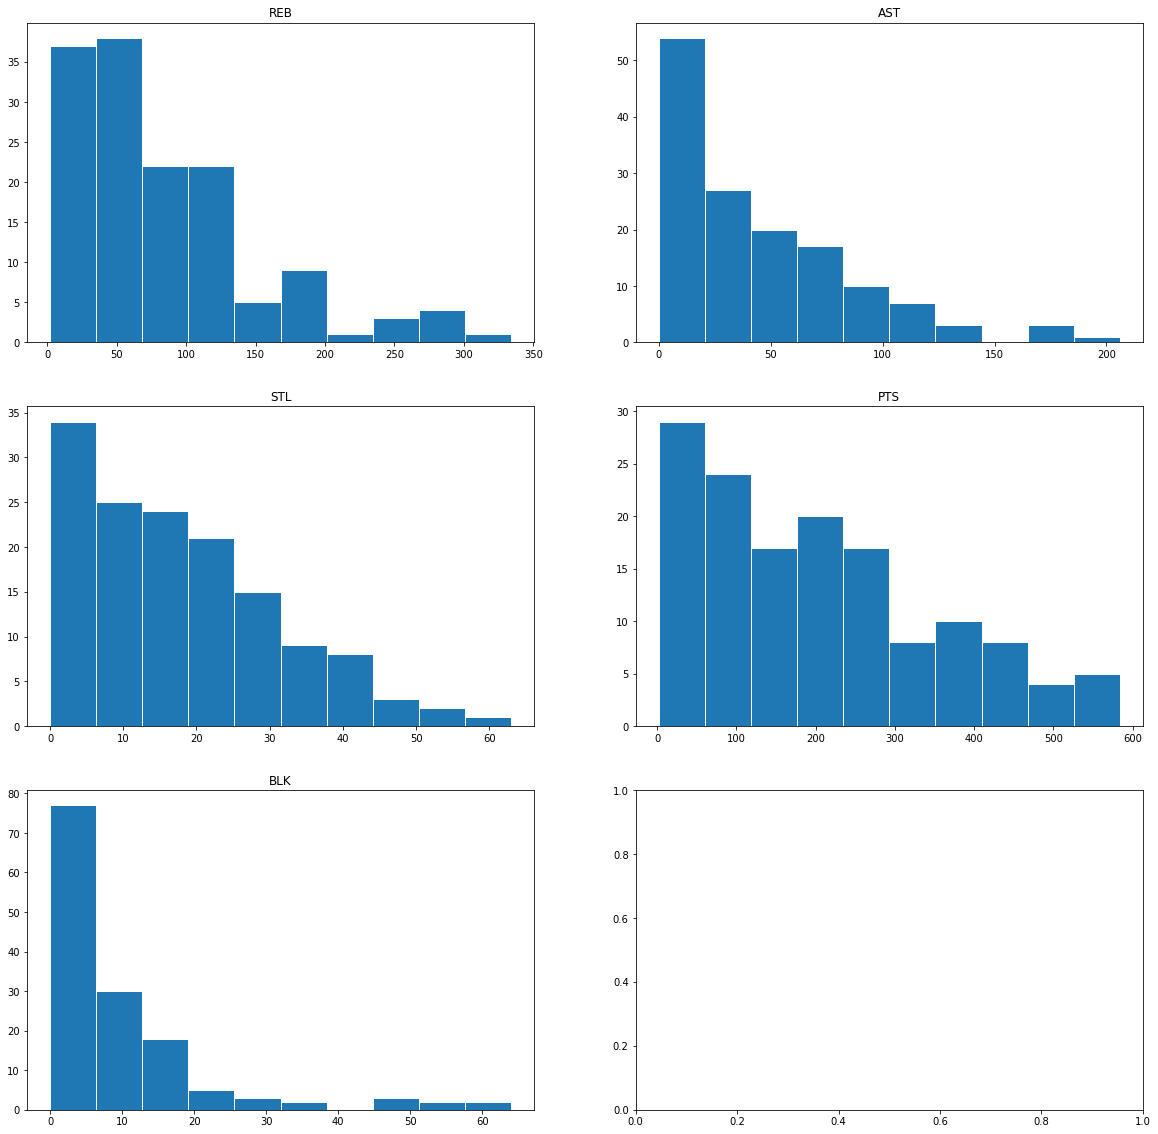

In [39]:
#your code here
# staging the figure area and arranging the plots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (20, 20))

# preparing the first plot
ax1.hist(wnba["REB"], edgecolor = "white")
ax1.set_title("REB")

# the second plot
ax2.hist(wnba["AST"], edgecolor = "white")
ax2.set_title("AST")

# the third
ax3.hist(wnba["STL"], edgecolor = "white")
ax3.set_title("STL")

# the forth
ax4.hist(wnba["PTS"], edgecolor = "white")
ax4.set_title("PTS")

# and the fifth
ax5.hist(wnba["BLK"], edgecolor = "white")
ax5.set_title("BLK")

**What conclusions do you think we can take from this plots?**

In [ ]:
#your conclusions here
"""
I'm not very confortable taking conclusions from plots. I'll only say that they all seem, to
different degrees, right-skewed, maybe looking like exponential distribuitions.
"""

As expected all of the above distribution are heavily skewed to the right, since most players will have very low to average stats while there will be a handful of star players whose stats peak above everyone else. It is also important to think about the fact that we are simply taking the stats as they are without considering the minutes played by each player. Even though skill plays a very important factor in determining this kind of stats we also have to consider that players that play more minutes will, on average, score more points (or blocks, assists, etc.).

**For the sake of it let's look at the same distributions by dividing those stats by the minutes played for each player in the dataset.** 

Text(0.5, 1.0, 'BLK by min')

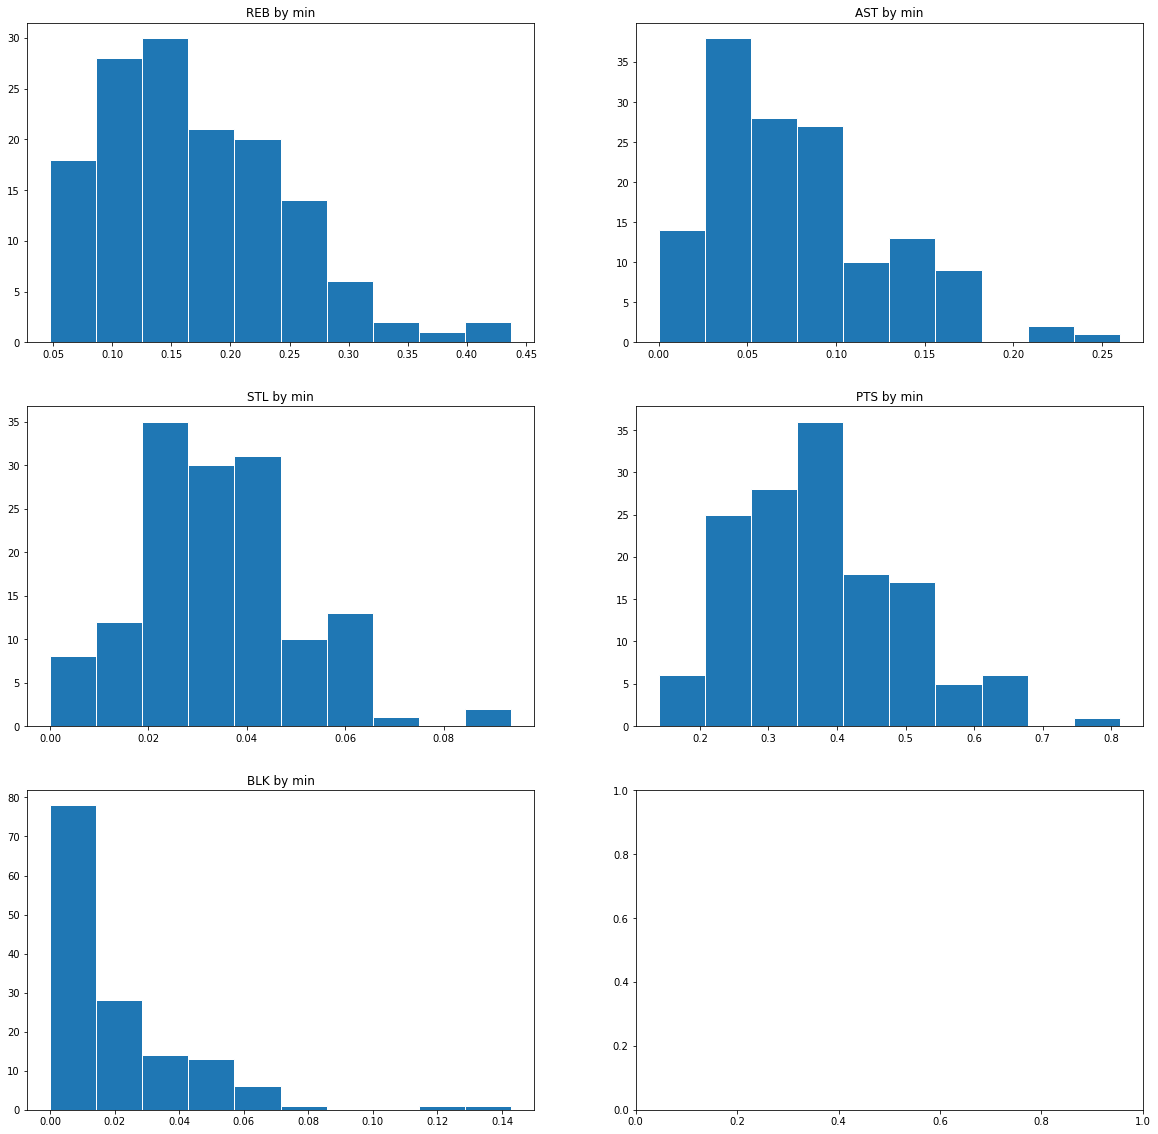

In [40]:
#your code here
# staging the figure area and arranging the plots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (20, 20))

# preparing the first plot
ax1.hist(wnba["REB"] / wnba["MIN"], edgecolor = "white")
ax1.set_title("REB by min")

# the second plot
ax2.hist(wnba["AST"] / wnba["MIN"], edgecolor = "white")
ax2.set_title("AST by min")

# the third
ax3.hist(wnba["STL"] / wnba["MIN"], edgecolor = "white")
ax3.set_title("STL by min")

# the forth
ax4.hist(wnba["PTS"] / wnba["MIN"], edgecolor = "white")
ax4.set_title("PTS by min")

# and the fifth
ax5.hist(wnba["BLK"] / wnba["MIN"], edgecolor = "white")
ax5.set_title("BLK by min")

**What conclusions do you think we can take from this plots?**

In [ ]:
#your conclusions here
"""
1) They 'look' more interesting;
2) They still all look, to different degrees, right-skewed, but only BLK (by min) kept it's 
(or a very similar) shape as before;
3) They seem much less exponentially-shaped (to the point that STL and PTS don't anymore — but
that's an ascersion I'm not confortable making).
"""

### Summary

The main insights we obtained from this exploratory analysis are:
- Game-related stats have a very high range of values.
- There are some extremes in the weight and age columns.
- The physical characteristics of the players more or less follow a standard distribution.
- We need to take into account that our dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

Now, it's time to try to put an end to your family's discussions. As seen on the README, the main discussions are:
- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

**Do you think you have all the necessary data to answer these questions?**

In [41]:
#your comments here
""" 
Granny says sis' too skinny to play: 
    Maybe (-> I mean, maybe we could answer this). 
   
    1) I need (at least)to know the weight of my sister, perhaps know the relation between BMI
    and muscle, and/or know if that has any relation whatsoever with playing at a pro league;
    
    2) Even if she, somehow, for some reason, couldn't in the WNBA, I'd have to still remark 
    that that doesn't mean she couldn't play in another professional league;
   
    3) What about the situation where she couldn't, but for a different reason?

Sis says most pro femmale players fail their free throws: 
    Not exactly; Since we have Free Throws made (FTM), Free Throws Attempts (FTA) and 
    Free Throws % (FT%) it seems possible to answer the question if we limit it to "most pro
    female WNBA players", but not without that caveat (we don't have data on other female pro
    leagues).
    
Bro-in-law heard on TV that the average assists among NBA (male) and WNBA (female) players is
52 for the 2016-2017 season, and is convinced it would be higher if we only considered the 
players from the WNBA:
    Now this one is... methodologically interesting. :) I wonder if we could. 
    
    Lets say that we're taking his word for it("the average assists among NBA and WNBA players
    is 52 for the 2016-2017 season"), and test *that*. Since we have the Assists (and the 
    Games played?) for the WNBA, we can actually calculate the average assists for the WNBA, 
    correct? Then maybe we can relate that to the above mentioned 52 overall average and 
    derive from that our answer..? Maybe? It might not actually be conclusive, but maybe it
    could work?
"""


Index(['Unnamed: 0', 'Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI',
       'Birth_Place', 'Birthdate', 'Age', 'College', 'Experience',
       'Games Played', 'MIN', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS',
       'DD2', 'TD3'],
      dtype='object')